# Método 1: Equação Normal

Dada por:

$\hat{\theta} = (X^TX)^{-1}X^Ty$

Onde:
- $\hat{\theta}$ é o valor de $\theta$ que minimiza a função de custo (nesse caso, o MSE)
- $y$ é o vetor de valores-alvo

### Import e Dados

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
n = 250
X = 200 * np.random.rand(n, 1)
y = 4 + 3 * X    + 2 * np.random.rand(n, 1) * X

# onde f(x) = 4 + 3x, mais o ruído

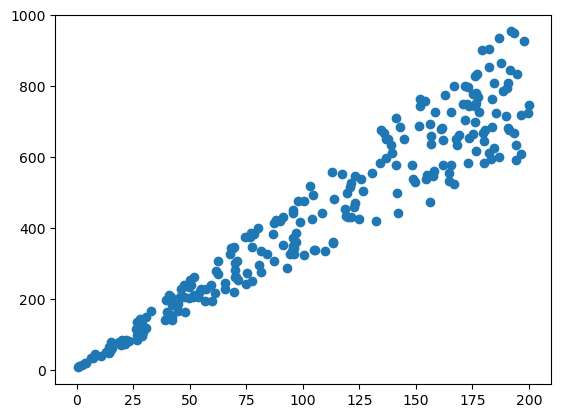

In [135]:
plt.scatter(X, y)
plt.show()

### Treinamento do modelo

In [136]:
X_b = np.c_[np.ones((n,1)), X] # adiciona o viés (valor 1) para cada instância
pd.DataFrame(X_b, columns=['bias', 'data'])

,bias,data
0,1.0,194.365396
1,1.0,191.600717
2,1.0,0.495523
3,1.0,104.861705
4,1.0,196.480464
...,...,...
245,1.0,173.612578
246,1.0,104.511307
247,1.0,193.322041
248,1.0,30.457731


In [137]:
import numpy.linalg as la # módulo de álgebra linear do NumPy

#           la.inv : inversa da matriz
#          array.T : transposta da matriz
# array.dot(array) : multiplicação de matrizes

In [138]:
theta_best = la.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # o correto seria 4 e 3

array([[7.5905156 ],
       [3.99417235]])

Seria o mesmo que fazer:
```python
theta_best = np.linalg.pinv(X_b).dot(y)
```
Que significa:

> $\hat{\theta} = X^{+}y$

Onde $X^{+}$ é a matriz _pseudoinversa_ de $X$:

> $X^{+} = (X^TX)^{-1}X^T$

### Validação do modelo

In [139]:
X_new = np.array([
    [np.min(X)],
    [np.max(X)]
]) # dois novos dados
X_new

array([[  0.49552253],
       [199.86412796]])

In [140]:
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[  1.        ,   0.49552253],
       [  1.        , 199.86412796]])

In [141]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  9.56971797],
       [805.88229024]])

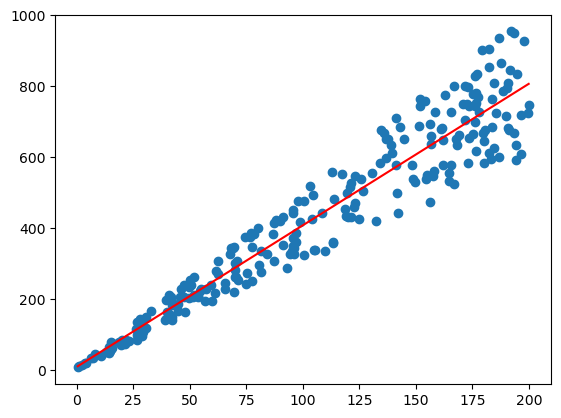

In [142]:
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.show()

# LinearRegression da `sklearn`

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
linear = LinearRegression()

In [146]:
linear.fit(X, y)

LinearRegression()

In [153]:
linear.intercept_, linear.coef_

(array([7.5905156]), array([[3.99417235]]))

In [156]:
y_pred = linear.predict(X_new)
y_pred

array([[  9.56971797],
       [805.88229024]])

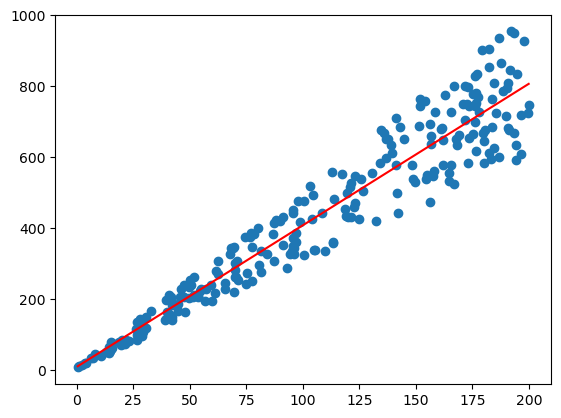

In [158]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, 'r-')
plt.show()

# Método 2: Gradiente Descendente